# livedata plot

In [1]:
import pandas as pd
import json
%matplotlib inline  
import matplotlib.pyplot as plt
import boto3
import time
bucket_name = 'caxebucketid4'
s3_client = boto3.client('s3')
df = pd.read_json("test.json",lines=True)

In [2]:
import threading

In [3]:
# graph1=[]
# graph2=[]
# graph3=[]
# init=0
# graph4=[init]

In [4]:
# while(1):
#     global graph1
#     global graph2
#     global graph3
#     global init
#     global graph4
#     x = pd.DataFrame(json.loads(((s3_client.get_object(Bucket = 'shafeeks3', Key='Id1'))['Body'].read())[:-1].decode('utf8')),index=[0])
#     graph1.append(x['C1'])
#     graph2.append(x['C2'])
#     graph3.append(x['C3'])
#     fig,ax = plt.subplots()
#     ax.plot(graph4,graph1,color='green',linewidth=6)
#     ax.plot(graph4,graph2,color='blue',linewidth=4)
#     ax.plot(graph4,graph3,color='red',linewidth=2)
#     plt.show()
#     init+=1
#     graph4.append(init)
#     time.sleep(1)

    

# Generating 3 phase data for a month , freq = s

In [5]:
import numpy as np
import random
import pandas as pd
np.random.seed(196)

Phase 1 data

In [6]:
V1 = np.random.uniform(220.08,240.53,2592000)
C1 = np.random.uniform(0.59,4.08,2592000)
F1 = np.random.uniform(49.98,50.10,2592000)
PF1 = np.random.uniform(0.691161,0.8,2592000)
A1 = (V1*C1)/1.41421356237
AP1 = A1/PF1
RP1 = ((AP1**2)-(A1**2))**(1/2)

Phase 2 Data

In [7]:
V2 = np.random.uniform(222.08,225.53,2592000)
C2 = np.random.uniform(0.9,6.1,2592000)
F2 = np.random.uniform(49.001,50.211,2592000)
PF2 = PF1+random.uniform(0.05,0.07)
A2 = (V2*C2)/1.41421356237
AP2 = A2/PF2
RP2 = ((AP2**2)-(A2**2))**(1/2)

Phase 3 data

In [8]:
V3 = np.random.uniform(225.58,241.3,2592000)
C3 = np.random.uniform(2.4,5.1,2592000)
F3 = np.random.uniform(49.341,50.911,2592000)
PF3 = PF1-random.uniform(0.05,0.07)
A3 = (V3*C3)/1.41421356237
AP3 = A3/PF3
RP3 = ((AP3**2)-(A3**2))**(1/2)

1 month timestamp in seconds

In [9]:
T= pd.date_range(start='2020-8-12',periods=2592000,freq='S')

In [10]:
df = pd.DataFrame({'V1':V1,'C1':C1,'A1':A1,'PF1':PF1,'AP1':AP1,'RP1':RP1,'F1':F1,'T':T})

In [11]:
df

,V1,C1,A1,PF1,AP1,RP1,F1,T
0,234.180465,3.918611,648.885129,0.796190,814.988094,493.106157,50.075857,2020-08-12 00:00:00
1,231.899597,0.765243,125.482835,0.708204,177.184702,125.093871,50.050566,2020-08-12 00:00:01
2,221.096090,2.048646,320.282293,0.747584,428.422904,284.544262,50.093331,2020-08-12 00:00:02
3,223.742515,1.949945,308.500574,0.720886,427.946358,296.589752,50.069783,2020-08-12 00:00:03
4,230.451922,3.933060,640.908326,0.752925,851.224909,560.196718,50.034531,2020-08-12 00:00:04
...,...,...,...,...,...,...,...,...
2591995,228.393670,2.184809,352.843804,0.786773,448.469571,276.814390,50.020906,2020-09-10 23:59:55
2591996,235.050432,3.676912,611.123940,0.697019,876.767647,628.688346,50.006020,2020-09-10 23:59:56
2591997,229.481788,1.541737,250.174835,0.752070,332.648211,219.242752,49.989094,2020-09-10 23:59:57
2591998,237.507088,1.062316,178.408474,0.776773,229.678986,144.647340,50.098360,2020-09-10 23:59:58


In [12]:
df = df.set_index('T')

Resampling

In [13]:
df_m = df.resample('min').mean()
df_m

,V1,C1,A1,PF1,AP1,RP1,F1
T,,,,,,,
2020-08-12 00:00:00,230.362575,2.635082,429.622023,0.748489,577.094494,384.208566,50.040592
2020-08-12 00:01:00,230.191807,2.452610,398.815537,0.748675,535.901442,356.998319,50.038423
2020-08-12 00:02:00,231.495298,2.233202,365.456311,0.748951,492.084301,328.756659,50.045484
2020-08-12 00:03:00,231.144283,2.395529,391.008837,0.745382,525.104015,349.625139,50.035586
2020-08-12 00:04:00,230.597636,2.379035,386.798414,0.750995,515.458562,339.895676,50.029045
...,...,...,...,...,...,...,...
2020-09-10 23:55:00,230.533809,2.271623,370.419738,0.742989,498.235442,332.358286,50.035174
2020-09-10 23:56:00,229.129502,2.339575,379.302788,0.747482,507.486780,336.418696,50.042323
2020-09-10 23:57:00,230.698302,2.477656,404.305977,0.746648,541.815529,359.963359,50.044199


In [14]:
df_h = df.resample('H').mean()

In [15]:
df_h

,V1,C1,A1,PF1,AP1,RP1,F1
T,,,,,,,
2020-08-12 00:00:00,230.306864,2.336592,380.584293,0.746569,510.944543,340.061051,50.040250
2020-08-12 01:00:00,230.265216,2.340465,381.157400,0.744920,512.681489,342.007127,50.039393
2020-08-12 02:00:00,230.320081,2.322030,378.118598,0.745985,508.102506,338.553333,50.039954
2020-08-12 03:00:00,230.377466,2.341997,381.526626,0.745465,512.767531,341.726797,50.039604
2020-08-12 04:00:00,230.406172,2.357872,384.065339,0.745136,516.307458,344.198806,50.040399
...,...,...,...,...,...,...,...
2020-09-10 19:00:00,230.358450,2.366476,385.388989,0.746308,517.613682,344.686813,50.040941
2020-09-10 20:00:00,230.347394,2.362030,384.765914,0.745988,516.592789,343.849234,50.039773
2020-09-10 21:00:00,230.143382,2.310750,376.065174,0.746455,504.543303,335.509548,50.038846


In [23]:
day_units = (df_h['A1'][0:24].sum())/1000
day_units

9.121934341211144

In [24]:
month_units = day_units*30
month_units

273.6580302363343

In [25]:
bill = month_units * 4
bill

1094.6321209453372

In [16]:
df_d = df.resample('D').mean()

In [17]:
df_w = df.resample('W').mean()

In [18]:
df_M = df.resample('M').mean()

In [19]:
df_M

,V1,C1,A1,PF1,AP1,RP1,F1
T,,,,,,,
2020-08-31,230.299288,2.334541,380.171920,0.745557,510.832296,340.347049,50.040019
2020-09-30,230.305144,2.337718,380.699182,0.745582,511.527863,340.799566,50.039890


In [57]:
len(df_m)

43200

In [58]:
T_min= pd.date_range(start='2020-8-12',periods=43200,freq='min')

In [59]:
df_m['T']=T_min
df_m

,V1,C1,A1,PF1,AP1,RP1,F1,T
T,,,,,,,,
2020-08-12 00:00:00,230.362575,2.635082,429.622023,0.748489,577.094494,384.208566,50.040592,2020-08-12 00:00:00
2020-08-12 00:01:00,230.191807,2.452610,398.815537,0.748675,535.901442,356.998319,50.038423,2020-08-12 00:01:00
2020-08-12 00:02:00,231.495298,2.233202,365.456311,0.748951,492.084301,328.756659,50.045484,2020-08-12 00:02:00
2020-08-12 00:03:00,231.144283,2.395529,391.008837,0.745382,525.104015,349.625139,50.035586,2020-08-12 00:03:00
2020-08-12 00:04:00,230.597636,2.379035,386.798414,0.750995,515.458562,339.895676,50.029045,2020-08-12 00:04:00
...,...,...,...,...,...,...,...,...
2020-09-10 23:55:00,230.533809,2.271623,370.419738,0.742989,498.235442,332.358286,50.035174,2020-09-10 23:55:00
2020-09-10 23:56:00,229.129502,2.339575,379.302788,0.747482,507.486780,336.418696,50.042323,2020-09-10 23:56:00
2020-09-10 23:57:00,230.698302,2.477656,404.305977,0.746648,541.815529,359.963359,50.044199,2020-09-10 23:57:00


In [60]:
df_m.to_csv (r'df_m.csv',index= False)

In [62]:
len(df_h)

720

In [63]:
T_h= pd.date_range(start='2020-8-12',periods=720,freq='H')

In [64]:
df_h['T']=T_h
df_h

,V1,C1,A1,PF1,AP1,RP1,F1,T
T,,,,,,,,
2020-08-12 00:00:00,230.306864,2.336592,380.584293,0.746569,510.944543,340.061051,50.040250,2020-08-12 00:00:00
2020-08-12 01:00:00,230.265216,2.340465,381.157400,0.744920,512.681489,342.007127,50.039393,2020-08-12 01:00:00
2020-08-12 02:00:00,230.320081,2.322030,378.118598,0.745985,508.102506,338.553333,50.039954,2020-08-12 02:00:00
2020-08-12 03:00:00,230.377466,2.341997,381.526626,0.745465,512.767531,341.726797,50.039604,2020-08-12 03:00:00
2020-08-12 04:00:00,230.406172,2.357872,384.065339,0.745136,516.307458,344.198806,50.040399,2020-08-12 04:00:00
...,...,...,...,...,...,...,...,...
2020-09-10 19:00:00,230.358450,2.366476,385.388989,0.746308,517.613682,344.686813,50.040941,2020-09-10 19:00:00
2020-09-10 20:00:00,230.347394,2.362030,384.765914,0.745988,516.592789,343.849234,50.039773,2020-09-10 20:00:00
2020-09-10 21:00:00,230.143382,2.310750,376.065174,0.746455,504.543303,335.509548,50.038846,2020-09-10 21:00:00


In [65]:
df_h.to_csv (r'df_h.csv',index= False)

In [66]:
len(df_d)

30

In [67]:
T_d= pd.date_range(start='2020-8-12',periods=30,freq='D')

In [68]:
df_d['T']=T_d
df_d

,V1,C1,A1,PF1,AP1,RP1,F1,T
T,,,,,,,,
2020-08-12,230.301430,2.333968,380.080598,0.745529,510.708162,340.264554,50.039807,2020-08-12
2020-08-13,230.285126,2.333685,380.005787,0.745595,510.585247,340.158120,50.040005,2020-08-13
2020-08-14,230.303329,2.339624,380.981818,0.745669,511.819426,340.919604,50.039986,2020-08-14
2020-08-15,230.274174,2.331668,379.679994,0.745447,510.226556,339.991159,50.040036,2020-08-15
2020-08-16,230.324932,2.332172,379.811841,0.745687,510.184233,339.773853,50.040201,2020-08-16
2020-08-17,230.270177,2.334756,380.177978,0.745750,510.682978,340.115613,50.040008,2020-08-17
2020-08-18,230.293782,2.334699,380.193306,0.745539,510.892407,340.412758,50.040087,2020-08-18
2020-08-19,230.291271,2.332587,379.840235,0.745517,510.463352,340.167042,50.039894,2020-08-19
2020-08-20,230.280075,2.339138,380.890610,0.745643,511.722153,340.879791,50.040050,2020-08-20


In [69]:
df_d.to_csv (r'df_d.csv',index= False)

In [36]:
df_w.to_csv (r'df_w.csv',index= False)

In [37]:
df_M.to_csv (r'df_M.csv',index= False)

In [43]:
len(df_m),len(df_h),len(df_d),len(df_w)

(43200, 720, 30, 5)

In [44]:
df_m.to_json (r'test.json',orient  = 'table')

# consider this data to be in S3 Bucket

In [229]:
%matplotlib inline 
import matplotlib.pyplot as plt

Press the appropriate number for the parameter you want to see? 
1. Current
2. Voltage
3. Acive Power
4. Frequency
5. Power Factor1
 Choose the appropriate number for the time frame you want the data
1. Minute
2. Hour
3. Day
4. Week
5. Month1
The maximum C1 usage was on 
2020-08-12 00:00:35, and 
minimum usage was on 
2020-08-12 00:00:44
The maximum C2 usage was on 
2020-08-12 00:00:33, and 
minimum usage was on 
2020-08-12 00:00:56
The maximum C3 usage was on 
2020-08-12 00:00:56, and 
minimum usage was on 
2020-08-12 00:00:32


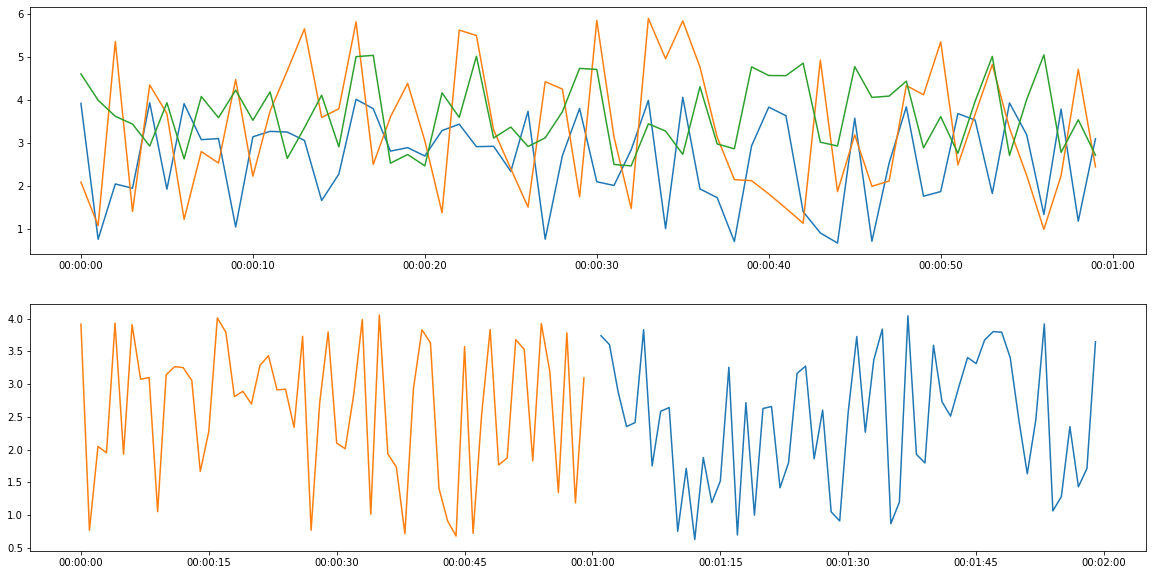

In [238]:
def plot_params (y,x):
    fig,(ax0,ax1) =plt.subplots(nrows=2,ncols=1,figsize=(20,10))
    if y==1:
        df_temp =  df[:60]
        df_temp2 = df[61:120]
    elif y==2:
        df_temp =  df_m[:60]
    elif y==3:
        df_temp =  df_h[:24]
    elif y==4:
        df_temp =  df_d[:7]
    elif y==5:
        df_temp =  df_d[:30]
        r=1;
    if  x==1:
        max_val_C1 = df_temp['C1'].idxmax()
        min_val_C1 = df_temp['C1'].idxmin()
        max_val_C2 = df_temp['C2'].idxmax()
        min_val_C2 = df_temp['C2'].idxmin()
        max_val_C3 = df_temp['C3'].idxmax()
        min_val_C3 = df_temp['C3'].idxmin()
        ax0.plot(df_temp['C1'],label='Recent 1 Minute Consumption');
        ax0.plot(df_temp['C2']);
        ax0.plot(df_temp['C3']);
        ax1.plot(df_temp2['C1'],label = 'Previous 1 Minute Consumption');
        ax1.plot(df_temp['C1']);
        print(f'The maximum C1 usage was on \n{max_val_C1}, and \nminimum usage was on \n{min_val_C1}')
        print(f'The maximum C2 usage was on \n{max_val_C2}, and \nminimum usage was on \n{min_val_C2}')
        print(f'The maximum C3 usage was on \n{max_val_C3}, and \nminimum usage was on \n{min_val_C3}')
    elif x==2:
        ax.plot(df_temp['V1']);
        ax.plot(df_temp['V2']);
        ax.plot(df_temp['V3']);
        print(f'The maximum usage was on \n{df_temp.idxmax()}, and minimum usage was on \n{df_temp.idxmin()}')
    elif x==3:
        ax.plot(df_temp['A1']);
        ax.plot(df_temp['A2']);
        ax.plot(df_temp['A3']);
        print(f'The maximum usage was on \n{df_temp.idxmax()}, and minimum usage was on \n{df_temp.idxmin()}')
    elif x==4:
        ax.plot(df_temp['F1']);
        ax.plot(df_temp['F2']);
        ax.plot(df_temp['F3']);
        print(f'The maximum usage was on \n{df_temp.idxmax()}, and minimum usage was on \n{df_temp.idxmin()}')
    elif x==5:
        ax.plot(df_temp['PF1']);
        ax.plot(df_temp['PF2']);
        ax.plot(df_temp['PF3']);
        print(f'The maximum usage was on {df_temp.idxmax()}, and minimum usage was on {df_temp.idxmin()}')
p = int(input('Press the appropriate number for the parameter you want to see? \n1. Current\n2. Voltage\n3. Acive Power\n4. Frequency\n5. Power Factor'))
f = int(input(' Choose the appropriate number for the time frame you want the data\n1. Minute\n2. Hour\n3. Day\n4. Week\n5. Month'))
plot_params(f,p);

In [ ]:
fig,ax = plt.subplots()
ax.plot()